# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing dataframe

In [3]:
customer_df = pd.read_pickle(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/02 Data/Prepared Data/customer_merged.pkl')


# 2. in file 'exercise 4.9'

In [19]:
customer_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Surnam,Gender,State,Age,date_joined,Number_of_dependants,Familial_status,income,True
0,2539329.0,1.0,prior,1.0,2.0,8.0,NaN,196,1.0,0.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
1,2398795.0,1.0,prior,2.0,3.0,7.0,15.0,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
2,473747.0,1.0,prior,3.0,3.0,12.0,21.0,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
3,2254736.0,1.0,prior,4.0,4.0,7.0,29.0,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both
4,431534.0,1.0,prior,5.0,4.0,15.0,28.0,196,1.0,1.0,...,Linda,Nguyen,Female,Alabama,31.0,2/17/2019,3.0,married,40423.0,both


# Histogram: order_hour_of_day

<AxesSubplot:ylabel='Frequency'>

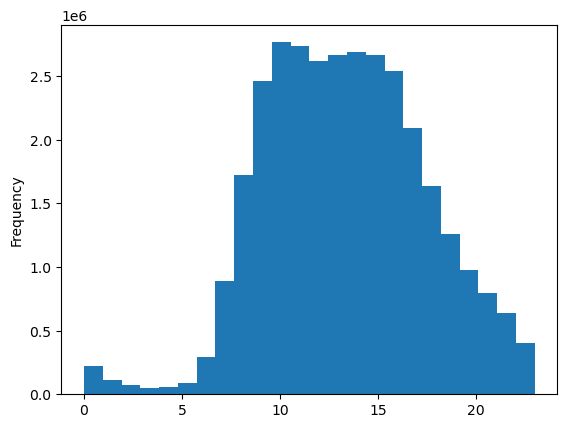

In [5]:
customer_df['order_hour_of_day'].plot.hist(bins = 24)


The bin size is appropriate. Orders seem to peak between 9 am and 4 pm.

# Bar chart: loyalty_flag

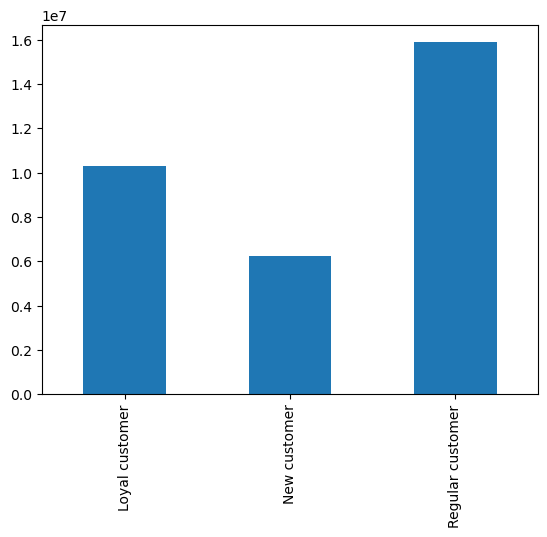

In [14]:
bar_chart=customer_df['loyalty_flag'].value_counts().sort_index().plot.bar()


The majority of customers are regular customers

# Line chart , prices vs hour of the day

In [4]:
np.random.seed(4)
spl = np.random.rand(len(customer_df)) <= 0.7

In [5]:
#store 70% of data in sample 'big'
big = customer_df[spl]
#store 30% of data in sample 'small'
small=customer_df[~spl]

Text(0, 0.5, 'Price of product')

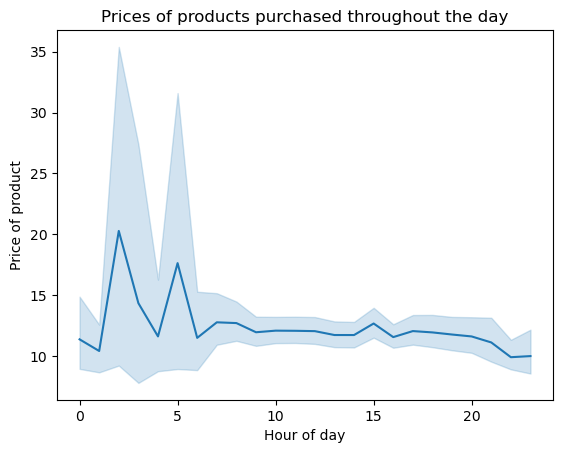

In [6]:
#creating sample dataframe
small_df=small[['order_hour_of_day','prices']]
#creating line chart
small_line = sns.lineplot(data = small_df, x = 'order_hour_of_day',y = 'prices')
plt.title("Prices of products purchased throughout the day")
plt.xlabel("Hour of day")
plt.ylabel("Price of product")


#More expensive things are bought during the very early hours of the day.

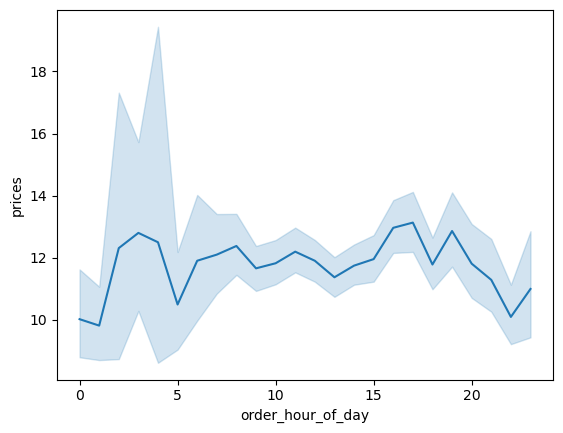

In [11]:
#creating sample dataframe
big_df=big[['order_hour_of_day','prices']]
#creating line chart
big_line = sns.lineplot(data = big_df, x = 'order_hour_of_day',y = 'prices')


#Are noth sample considered similar and thus representative?

# Age and family situation line chart

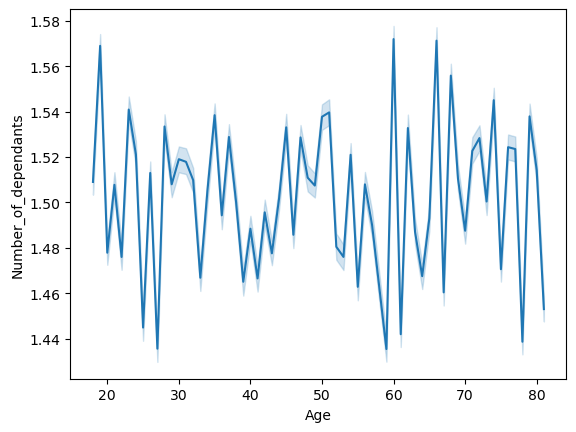

In [12]:
#creating sample dataframe
small_dfr=small[['Age','Number_of_dependants']]
#creating line chart
small_line = sns.lineplot(data = small_dfr, x = 'Age',y = 'Number_of_dependants')


There doesn't seem to be a correltion between the age of the customer and the sive of its family.

# Scatter plot between age and spending power (income)

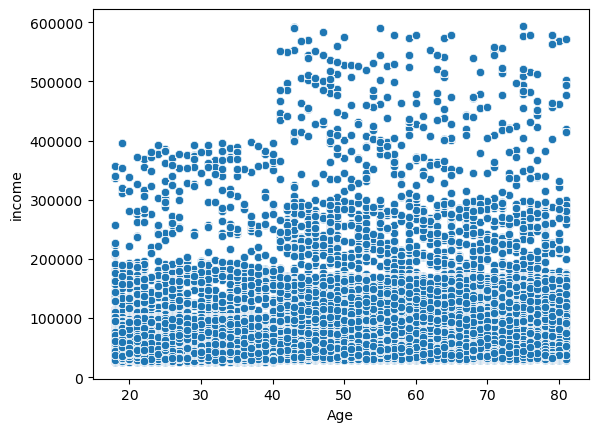

In [17]:
plot=sns.scatterplot(x = 'Age', y = 'income',data = customer_df)


In [ ]:
#Over the age of 40, the income of customers increase

# Exporting charts

In [15]:
bar_chart.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/bar_chart.png')

In [16]:
# Exporting line chart age vs. family situation
small_line.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/line_chart_age_hour of day.png')


In [18]:
# Exporting line chart age and spending power (income)
plot.figure.savefig(r'/Users/nayeraibrahim/Documents/CF assignments/Python/27-10-2020 Instacart Basket Analysis/04 Analysis/Visualisations/plot.png')
